**Artificial Intelligence-Aided Analysis of Hydrogen-Based Monoclinic Structures and Modeling of Structure-Property Relationships**

**2#EDA and Preprocessing Steps of Data**

Göktuğ USTA & Sedef KORKMAZ | Izmir Democracy University - Electrical and Electronics Engineering Department - 2025

goktugustaa@gmail.com 

sedefkorkmaz67@hotmail.com

Data retrieved from The Materials Project API (https://next-gen.materialsproject.org/).

In [ ]:
# --- SETUP LIBRARY --- #
import pandas as pd 

In [3]:
# --- READ THE ACQUIRED DATAS --- #
data = pd.read_csv("monoclinic_hydrogen_data.csv")
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4270 entries, 0 to 4269
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   material_id    4270 non-null   object 
 1   formula        4270 non-null   object 
 2   elements       4270 non-null   object 
 3   volume         4270 non-null   float64
 4   density        4270 non-null   float64
 5   band_gap       4270 non-null   float64
 6   magnetization  4270 non-null   float64
 7   lattice_a      4270 non-null   float64
 8   lattice_b      4270 non-null   float64
 9   lattice_c      4270 non-null   float64
dtypes: float64(7), object(3)
memory usage: 333.7+ KB


In [4]:
# --- PREPROCESSING --- #
numeric_columns = df.select_dtypes(include=["float64", "int64", "bool"]).columns
null_values = df.isnull().sum()
print("Numerical Columns: ", numeric_columns)
print("\n")
print("Null value count: ", null_values)


Numerical Columns:  Index(['volume', 'density', 'band_gap', 'magnetization', 'lattice_a',
       'lattice_b', 'lattice_c'],
      dtype='object')


Null value count:  material_id      0
formula          0
elements         0
volume           0
density          0
band_gap         0
magnetization    0
lattice_a        0
lattice_b        0
lattice_c        0
dtype: int64


In [6]:
cols_to_drop = ["material_id", "elements", "formula"]
df_ml = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors='ignore')


In [7]:
df_ml.describe().T

,count,mean,std,min,25%,50%,75%,max
volume,4270.0,779.038749,562.591898,28.577852,409.167798,664.165898,990.687345,6015.867498
density,4270.0,2.540893,1.058744,0.071361,1.824088,2.350654,3.047037,15.777973
band_gap,4270.0,2.878710,1.778213,0.000000,1.518575,2.939000,4.292125,8.596500
magnetization,4270.0,3.470861,8.438550,0.000000,0.000247,0.002763,3.996584,160.050111
lattice_a,4270.0,8.856020,3.514721,2.463933,6.497642,8.086044,10.505884,33.277729
lattice_b,4270.0,8.260331,2.836427,2.656866,6.372946,7.776801,9.568083,31.772809
lattice_c,4270.0,11.365202,4.377823,3.136891,8.398105,10.617355,13.543852,47.741101


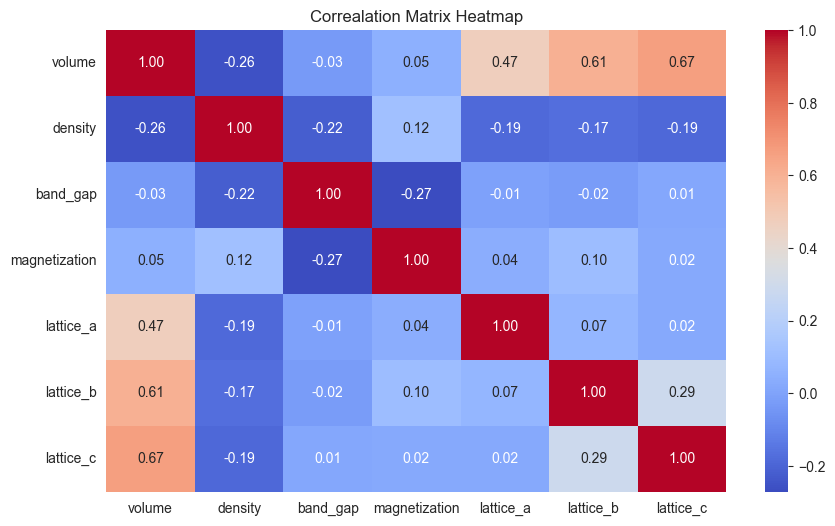

In [ ]:
# --- DATA VISUALATION --- #
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.title("Correalation Matrix Heatmap")
sns.heatmap(df_ml[numeric_columns].corr(), annot=True, fmt=".2f",cmap="coolwarm")
plt.show()

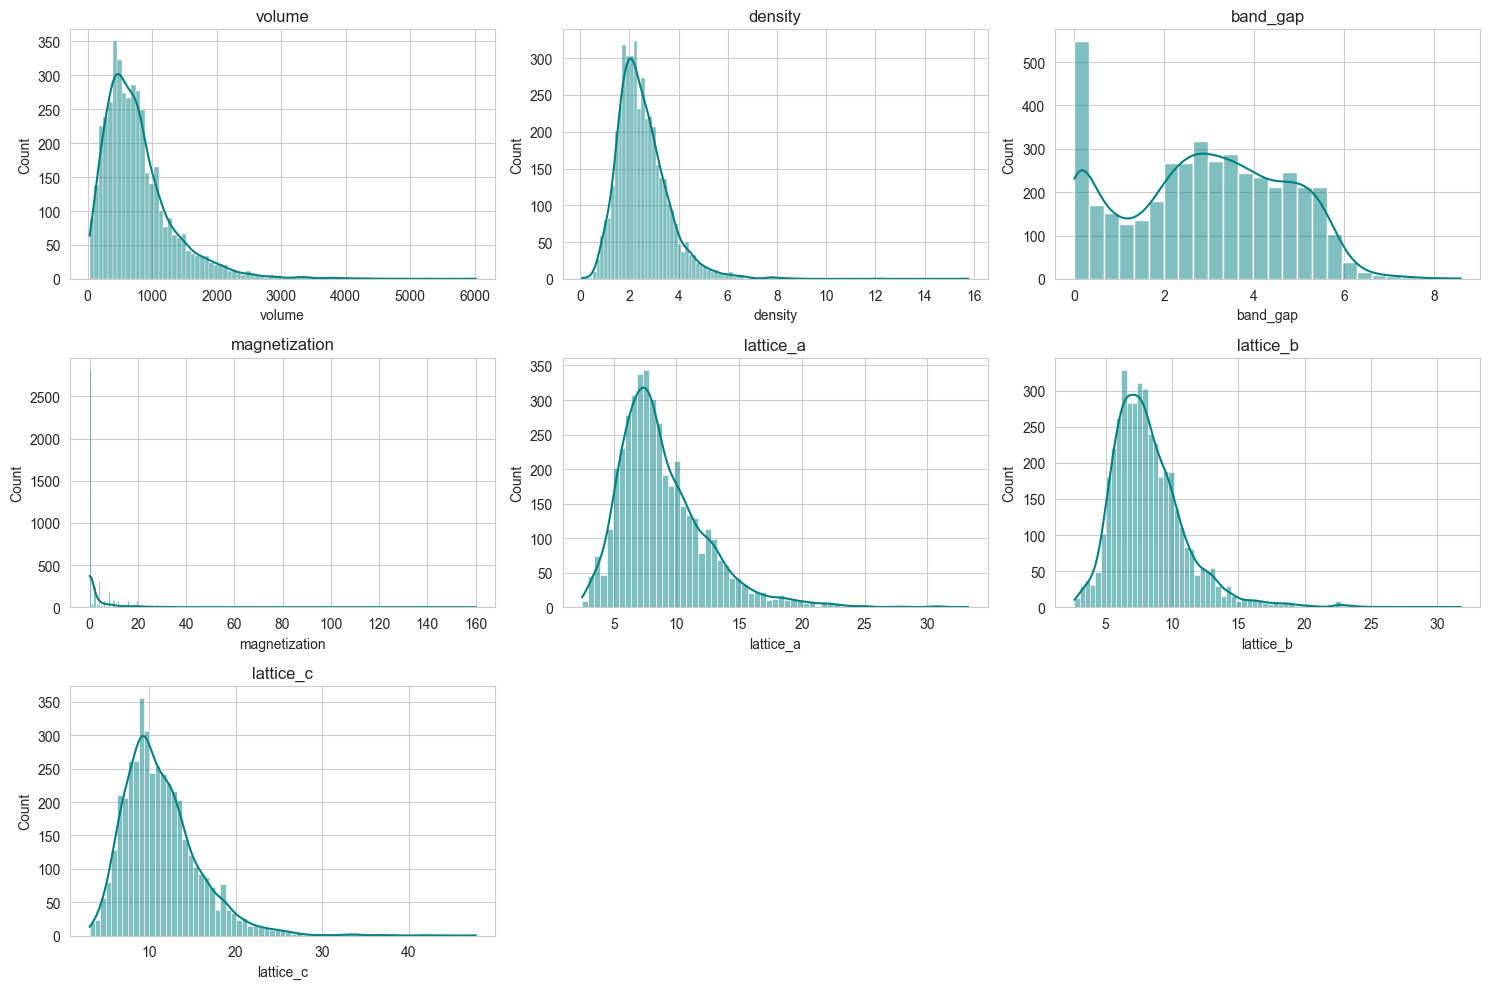

In [17]:
# --- DISTRIBUTION OF NUMERICAL DATAS --- #
import numpy as np
numeric_cols = df_ml.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_ml[col], kde=True, color='teal')
    plt.title(col)
    plt.tight_layout()
plt.show()

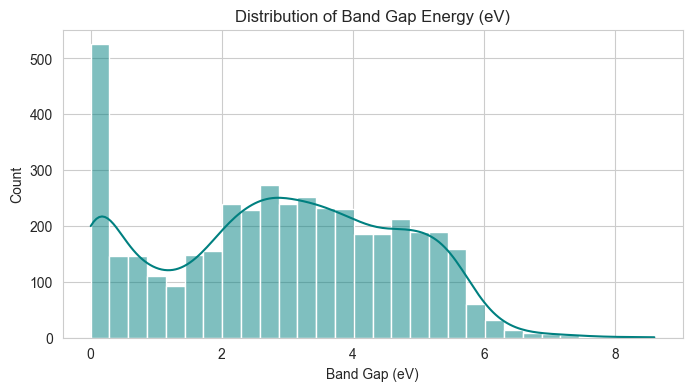

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(df_ml['band_gap'], bins=30, kde=True, color='teal')
plt.title("Distribution of Band Gap Energy (eV)")
plt.xlabel("Band Gap (eV)")
plt.show()